# Part 0. Google Colab Set Up

In [ ]:
# Mount Google Drive
from google.colab import drive

ROOT = "/content/drive"     
print(ROOT)                 

drive.mount(ROOT, force_remount=True)


/content/drive
Mounted at /content/drive


In [ ]:
% cd /content/drive/MyDrive/rl_forex

/content/drive/MyDrive/rl_forex


## Anaconda Set Up

In [ ]:
% env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.9.2-Linux-x86_64.sh	
MINICONDA_PREFIX=/usr/local
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
Unpacking payload ...
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2020.10.14=0
    - certifi==2020.6.20=pyhd3eb1b0_3
    - cffi==1.14.3=py37h261ae71_2
    - chardet==3.0.4=py37h06a4308_1003
    - conda-package-handling==1.7.2=py37h03888b9_0
    - conda==4.9.2=py37h06a4308_0
    - cryptography==3.2.1=py37h3c74f83_1
    - idna==2.10=py_0
    - ld_impl_linux-64==2.33.1=h53a641e_7
    - libedit==3.1.20191231=h14c3975_1
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.1.0=hdf63c60_0
    - libstdcxx-ng==9.1.0=hdf63c60_0
    - ncurses==6.2=he6710b0_1
    - openssl==1.1.1h=h7b6447c_0
    - pip==20.2.4=py37h06a4308_0
    - pycosat==0.6.3=py37h27cfd23_0
    - pycparser==2.20=py_2
    - pyopenssl==19.1.0=pyhd3eb1b0_1
    - pysocks==1.7.1=py37_1
    - python==3.7.9=h7579374_0
    - readline==8.0=h7b6447c_0
    - 

In [ ]:
%%bash

conda install --channel defaults conda=4.9.2 python=3.7 --yes
conda config --add channels conda-forge
conda config --set channel_priority strict

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda=4.9.2
    - python=3.7


The following packages will be UPDATED:

  ca-certificates                              2020.10.14-0 --> 2021.5.25-h06a4308_1
  certifi            pkgs/main/noarch::certifi-2020.6.20-p~ --> pkgs/main/linux-64::certifi-2021.5.30-py37h06a4308_0
  openssl                                 1.1.1h-h7b6447c_0 --> 1.1.1k-h27cfd23_0
  python                                   3.7.9-h7579374_0 --> 3.7.10-hdb3f193_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [ ]:
import sys
 
# Add conda packages to PATH
_ = (sys.path
        .append("/usr/local/envs/rl_fx/lib/python3.7/site-packages"))

# Remove Colab preinstalled libraries
sys.path.remove('/usr/local/lib/python3.7/dist-packages')

ValueError: ignored

## Import Conda Environment from yml 

In [ ]:
%%bash

conda env create -f environment.yml


CondaValueError: prefix already exists: /usr/local/envs/rl_fx



In [ ]:
! source activate rl_fx && pip install yfinance==0.1.55


# Train

In [ ]:
%load_ext autoreload
%autoreload

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time
from statistics import mean
from itertools import accumulate
from empyrical import sortino_ratio

from finrl.config import config
from finrl.preprocessing.preprocessors import FeatureEngineer
from finrl.preprocessing import data
from finrl.preprocessing.data import data_split
from finrl.trade.backtest import evaluate_policy_rewards
from finrl.env.env_stocktrading import StockTradingEnv
from finrl.trade.backtest import BackTestStats, BaselineStats, BackTestPlot

from stable_baselines.a2c import A2C

import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
month = 1
year = 17

if month < 10:
  str_month = "0" + str(month)
else:
  str_month = str(month)
monthdata = str_month + '_' + str(year)
print(monthdata)
EURUSD_df=data.load_ohlc_dataset(f"15min/EURUSD/{monthdata}.csv")
GBPUSD_df=data.load_ohlc_dataset(f"15min/GBPUSD/{monthdata}.csv")
USDJPY_df=data.load_ohlc_dataset(f"15min/USDJPY/{monthdata}.csv")
USDCHF_df=data.load_ohlc_dataset(f"15min/USDJPY/{monthdata}.csv")

# EURUSD_list = []
# GBPUSD_list = []
# USDJPY_list = []
# USDCHF_list = []

# for month in range(1, 5):
#   if month < 10:
#     str_month = "0" + str(month)
#   else:
#     str_month = str(month)
#   monthdata = str_month + '_' + str(year)
#   print(monthdata)

#   EURUSD_list.append(data.load_ohlc_dataset(f"15min/EURUSD/{monthdata}.csv"))
#   GBPUSD_list.append(data.load_ohlc_dataset(f"15min/GBPUSD/{monthdata}.csv"))
#   USDJPY_list.append(data.load_ohlc_dataset(f"15min/USDJPY/{monthdata}.csv"))
#   USDCHF_list.append(data.load_ohlc_dataset(f"15min/USDJPY/{monthdata}.csv"))

#   EURUSD_df=pd.concat(EURUSD_list)
#   GBPUSD_df=pd.concat(GBPUSD_list)
#   USDJPY_df=pd.concat(USDJPY_list)
#   USDCHF_df=pd.concat(USDCHF_list)

# monthdata = "01_05_17"

In [ ]:
param_map = {
                'sma_9': {'talib_name' : 'SMA', 'time_period' : 9}, #time_period in seoonds
                'ema_9': {'talib_name' : 'EMA', 'time_period' : 9}, #time_period in seoonds
                'sma_21' : {'talib_name' : 'SMA', 'time_period' : 21},
                'ema_21' : {'talib_name' : 'EMA', 'time_period' : 21},
                'bbands_9':{'talib_name':'BBANDS','time_period':9,'nbdevup':2.0,'nbdevdn':2.0},
                'bbands_12':{'talib_name':'BBANDS','time_period':12,'nbdevup':2.0,'nbdevdn':2.0},
                'macd_entry':{'talib_name':'MACD', 'fastperiod':12, 'slowperiod':26,'signalperiod':9},
                'macd_exit':{'talib_name':'MACD', 'fastperiod':19, 'slowperiod':39,'signalperiod':9},
                'stoch':{'talib_name':'STOCH', 'fastk_period':5, 'slowk_period':3, 'slowk_matype':0, 'slowd_period':3, 'slowd_matype':0},
                'rsi_14':{'talib_name':'RSI', 'time_period':14},
                'rsi_4':{'talib_name':'RSI','time_period':4},
                'mom_10':{'talib_name':'MOM', 'time_period':10},
                'stochrsi_14':{'talib_name':'STOCHRSI', 'time_period':14, 'fastk_period':5,'fastd_period':3, 'fastd_matype':0},
                'kama_30':{'talib_name':'KAMA', 'time_period':30},
                't3_5':{'talib_name':'T3', 'time_period':5, 'vfactor':0.7},
                'atr_14':{'talib_name':'ATR', 'time_period':14},
                'natr_14':{'talib_name':'NATR', 'time_period':14},
                'tsf_14':{'talib_name':'TSF', 'time_period':14},
}

In [ ]:
from finrl.preprocessing import data, preprocessors

EURUSD_train, tech_indicator_list = preprocessors.FeatureEngineer(EURUSD_df,
                          tech_indicator_params_map = param_map,
                          use_technical_indicator=True,
                          user_defined_feature=False).preprocess_data()

GBPUSD_train, tech_indicator_list = preprocessors.FeatureEngineer(GBPUSD_df,
                          tech_indicator_params_map = param_map,
                          use_technical_indicator=True,
                          user_defined_feature=False).preprocess_data()

USDJPY_train, tech_indicator_list = preprocessors.FeatureEngineer(USDJPY_df,
                          tech_indicator_params_map = param_map,
                          use_technical_indicator=True,
                          user_defined_feature=False).preprocess_data()

USDCHF_train, tech_indicator_list = preprocessors.FeatureEngineer(USDCHF_df,
                          tech_indicator_params_map = param_map,
                          use_technical_indicator=True,
                          user_defined_feature=False).preprocess_data()

In [ ]:
dfs_list = {
    "EURUSD" : EURUSD_train,
    "GBPUSD" : GBPUSD_train,
    "USDJPY" : USDJPY_train,
    "USDCHF" : USDCHF_train
}

In [ ]:
stock_dimension = len(dfs_list)
state_space = 1 + 3*stock_dimension + len(tech_indicator_list)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")
model_input_space = 2 + 4*stock_dimension + len(tech_indicator_list)*stock_dimension
print(f"Input Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 4, State Space: 125
Input Dimension: 4, State Space: 125


In [ ]:
env_kwargs = {
    "hmax": 10000, 
    "dfs_list" : dfs_list,
    "initial_amount": 100000, 
    "buy_cost_pct": 0, 
    "sell_cost_pct": 0, 
    "state_space": state_space, 
    "tech_indicator_list": tech_indicator_list, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4
}

In [ ]:
bo_iter = 0
def A2C_train(learning_rate_val, epsilon):

    global bo_iter

    start = time.time()

    bo_iter+=1

    e_train_gym = StockTradingEnv(**env_kwargs)
    print(e_train_gym.data)

    env_train, _ = e_train_gym.get_sb_env()
    
    num_episodes = 200
    total_timesteps = num_episodes * len(EURUSD_train)

    model_name = "a2c"
    MODELS = {"a2c": A2C}
    MODEL_PARAMS = {"n_steps": 20, "ent_coef": 0.001, "learning_rate": learning_rate_val, 'epsilon': epsilon}
    model_a2c = MODELS[model_name](
            policy="MlpLstmPolicy",
            env=env_train,
            tensorboard_log=f"{config.TENSORBOARD_LOG_DIR}/{model_name}",
            verbose=1,
            policy_kwargs=None,
            seed = 1,
            **MODEL_PARAMS,
        )
    trained_a2c = model_a2c.learn(total_timesteps=total_timesteps, tb_log_name='a2c')

    env_train, _ = e_train_gym.get_sb_env()
    episodes_rewards, episode_lengths, rewards_memory_episodes = evaluate_policy_rewards(trained_a2c, env_train, deterministic=False)

    fig, axs = plt.subplots()

    axs.plot(list(accumulate(rewards_memory_episodes[0])))
    axs.set_title("Accumulated rewards (Gains in NOP) against timesteps")
    fig.tight_layout()

    fig.savefig(f'plots/bo_results/{monthdata}/iteration_{bo_iter}')

    trained_a2c.save(f"saved_models/{monthdata}/model-{bo_iter}")

    with open(f'results/{monthdata}/train_episode_rewards.npy', 'wb') as f:
        np.save(f, np.array(episodes_rewards))
    with open(f'results/{monthdata}/train_rewards_memory.npy', 'wb') as f:
        np.save(f, np.array(rewards_memory_episodes))

    mean_reward = mean(episodes_rewards)
    print("Mean Episodic Reward : ", mean_reward)

    sortino = sortino_ratio(pd.Series(rewards_memory_episodes[0]))
    print("Sortino Ratio :", sortino)

    end = time.time()
    print("Elapsed time: ", end-start)
    
    return sortino

In [ ]:
from bayes_opt import BayesianOptimization

pbounds = {'learning_rate_val': (0.00001, 0.0002), 'epsilon': (1e-06, 2e-05)}

optimizer = BayesianOptimization(
    f=A2C_train,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

Streaming output truncated to the last 5000 lines.
environment/total_trades 8811
train/episode_reward -0.0030950515197531786
---------------------------------
| explained_variance | -5.79    |
| fps                | 183      |
| nupdates           | 19100    |
| policy_entropy     | 5.76     |
| total_timesteps    | 382000   |
| value_loss         | 3.69e-05 |
---------------------------------
environment/nop_value 99622.65559746622
environment/total_reward -377.34440253378125
environment/total_reward_pct -0.37734440253378126
environment/total_cost 0.0
environment/total_trades 8276
train/episode_reward -0.0018608149211693673
---------------------------------
| explained_variance | 0.000238 |
| fps                | 183      |
| nupdates           | 19200    |
| policy_entropy     | 5.76     |
| total_timesteps    | 384000   |
| value_loss         | 0.000211 |
---------------------------------
---------------------------------
| explained_variance | -0.643   |
| fps                | 183 

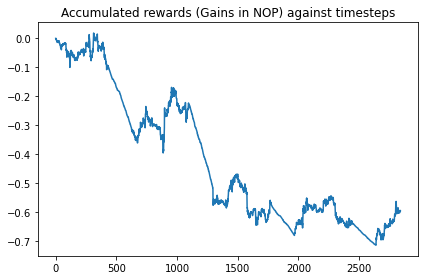

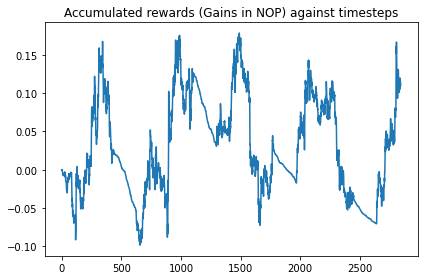

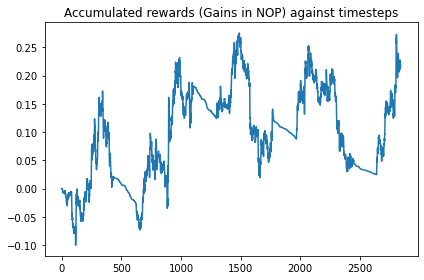

In [ ]:
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

logger = JSONLogger(path=f"results/{monthdata}/BO_logs.json")
optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

optimizer.maximize(init_points=1, n_iter=2)

# Trade

In [ ]:
month = 1
year = 18

if month < 10:
  str_month = "0" + str(month)
else:
  str_month = str(month)
trade_monthdata = str_month + '_' + str(year)
print(trade_monthdata)

EURUSD_trade_df=data.load_ohlc_dataset(f"15min/EURUSD/{trade_monthdata}.csv")
GBPUSD_trade_df=data.load_ohlc_dataset(f"15min/GBPUSD/{trade_monthdata}.csv")
USDJPY_trade_df=data.load_ohlc_dataset(f"15min/USDJPY/{trade_monthdata}.csv")
USDCHF_trade_df=data.load_ohlc_dataset(f"15min/USDJPY/{trade_monthdata}.csv")

EURUSD_trade, tech_indicator_list = preprocessors.FeatureEngineer(EURUSD_trade_df,
                          tech_indicator_params_map = param_map,
                          use_technical_indicator=True,
                          user_defined_feature=False).preprocess_data()
GBPUSD_trade, tech_indicator_list = preprocessors.FeatureEngineer(GBPUSD_trade_df,
                          tech_indicator_params_map = param_map,
                          use_technical_indicator=True,
                          user_defined_feature=False).preprocess_data()
USDJPY_trade, tech_indicator_list = preprocessors.FeatureEngineer(USDJPY_trade_df,
                          tech_indicator_params_map = param_map,
                          use_technical_indicator=True,
                          user_defined_feature=False).preprocess_data()
USDCHF_trade, tech_indicator_list = preprocessors.FeatureEngineer(USDCHF_trade_df,
                          tech_indicator_params_map = param_map,
                          use_technical_indicator=True,
                          user_defined_feature=False).preprocess_data()
dfs_list = {
    "EURUSD" : EURUSD_trade,
    "GBPUSD" : GBPUSD_trade,
    "USDJPY" : USDJPY_trade,
    "USDCHF" : USDCHF_trade
}
stock_dimension = len(dfs_list)
state_space = 1 + 3*stock_dimension + len(tech_indicator_list)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")
model_input_space = 2 + 4*stock_dimension + len(tech_indicator_list)*stock_dimension
print(f"Input Dimension: {stock_dimension}, State Space: {state_space}")

01_18
Successfully added technical indicators
Successfully added technical indicators
Successfully added technical indicators
Successfully added technical indicators
Stock Dimension: 4, State Space: 125
Input Dimension: 4, State Space: 125


In [ ]:
env_kwargs = {
    "hmax": 10000, 
    "dfs_list" : dfs_list,
    "initial_amount": 100000, 
    "buy_cost_pct": 0, 
    "sell_cost_pct": 0, 
    "state_space": state_space, 
    "tech_indicator_list": tech_indicator_list, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4
}

In [ ]:
e_trade_gym = StockTradingEnv(**env_kwargs)
env_trade, _ = e_trade_gym.get_sb_env()

In [ ]:
for i, res in enumerate(optimizer.res):
  if res == optimizer.max:
    break
  
trained_a2c = A2C.load(f"saved_models/{monthdata}/model-{i+1}", env=env_trade)

environment/nop_value 100624.27353003768
environment/total_reward 624.2735300376808
environment/total_reward_pct 0.6242735300376808
environment/total_cost 0.0
environment/total_trades 7372
train/episode_reward -0.0038718662857863823
environment/nop_value 101287.02962035954
environment/total_reward 1287.0296203595353
environment/total_reward_pct 1.2870296203595355
environment/total_cost 0.0
environment/total_trades 6856
train/episode_reward -0.003690493217580661
environment/nop_value 101057.29086507295
environment/total_reward 1057.2908650729514
environment/total_reward_pct 1.0572908650729513
environment/total_cost 0.0
environment/total_trades 7195
train/episode_reward -0.003888528122554999
environment/nop_value 100186.85260460949
environment/total_reward 186.85260460949212
environment/total_reward_pct 0.18685260460949213
environment/total_cost 0.0
environment/total_trades 6776
train/episode_reward -0.0037447874642821265
environment/nop_value 100577.92460093567
environment/total_reward 

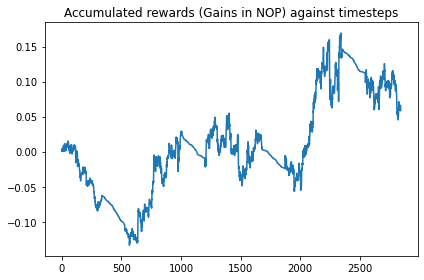

In [ ]:
trade_episodes_rewards, trade_episode_lengths, trade_rewards_memory_episodes = evaluate_policy_rewards(trained_a2c, env_trade, deterministic=False)
with open(f'results/{monthdata}/train_episode_rewards.npy', 'wb') as f:
        np.save(f, np.array(trade_episodes_rewards))
with open(f'results/{monthdata}/train_rewards_memory.npy', 'wb') as f:
    np.save(f, np.array(trade_rewards_memory_episodes))

fig, axs = plt.subplots()

axs.plot(list(accumulate(trade_rewards_memory_episodes[0])))
axs.set_title("Accumulated rewards (Gains in NOP) against timesteps")
fig.tight_layout()

fig.savefig(f'plots/performance/{monthdata}/iteration_{bo_iter}')

In [ ]:
from matplotlib import gridspec

def plot_rewards_with_spread(rewards_memory_episodes : list):
    for i in range(len(rewards_memory_episodes)):
        fig = plt.figure()
        gs = gridspec.GridSpec(2, 1, hspace=0)
        ax0 = plt.subplot(gs[0])
        fig.suptitle("Rewards (Gains in NOP)(Top) &\n Bid-Ask spreads(Bottom) against timesteps")
        line0, = ax0.plot(rewards_memory_episodes[i])
        ax1 = plt.subplot(gs[1], sharex = ax0)
        yticks = ax1.yaxis.get_major_ticks()
        yticks[-1].label1.set_visible(False)
        line1, = ax1.plot(e_trade_gym.df[('EURUSD', 'ask_close')]-e_trade_gym.df[('EURUSD','bid_close')], color='b', linestyle='--')
        plt.setp(ax0.get_xticklabels(), visible=False)
        fig.savefig(f'plots/performance/{monthdata}/bidask_{trade_monthdata}_{i}')

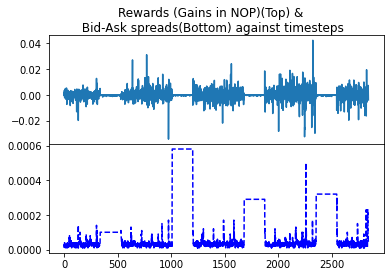

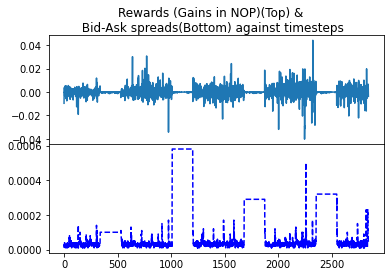

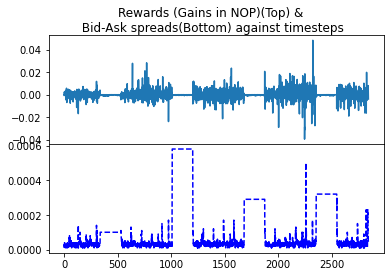

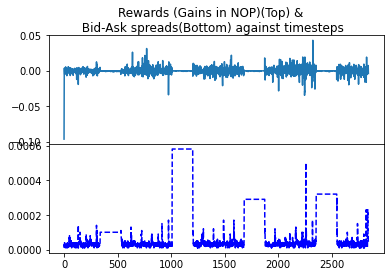

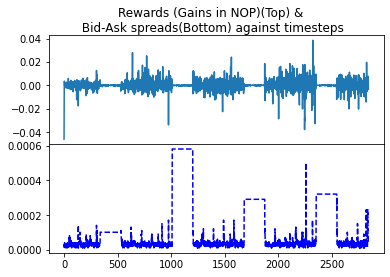

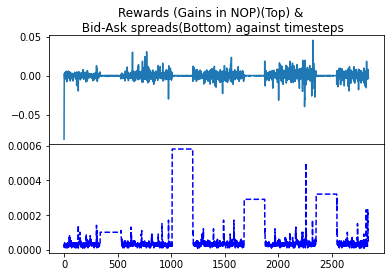

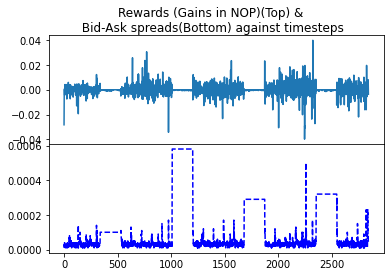

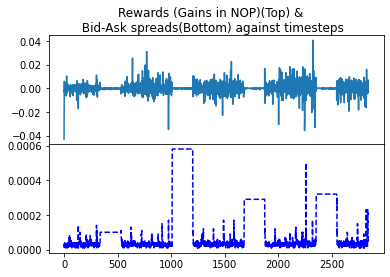

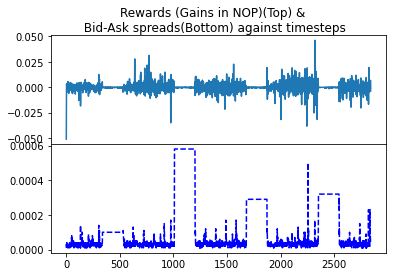

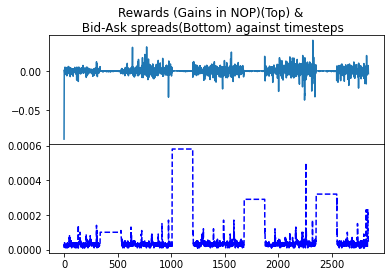

In [ ]:
plot_rewards_with_spread(trade_rewards_memory_episodes)